In [1]:
import pandas as pd 
import numpy as np
import os
os.getcwd()

'/Users/47683/Desktop/Mem/notebooks'

In [2]:
learn_df = pd.read_csv('../data/settles.acl16.learning_traces.13m.csv.gz')

In [3]:
learn_df.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1


In [9]:
num_users = learn_df.user_id.nunique()
print(f"Number of unique users: {num_users}")

Number of unique users: 115222


count    1.285423e+07
mean     8.961056e-01
std      2.714048e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: p_recall, dtype: float64


<AxesSubplot:>

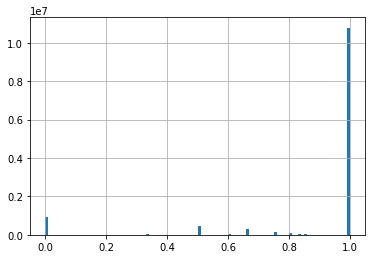

In [14]:
print(f"{learn_df.p_recall.describe()}")
learn_df.p_recall.hist(bins= 100)

In [36]:
labels = ['']
learn_df["p_recall_bucket"]= pd.cut(learn_df.p_recall, bins= 5, labels=['low', 'low_med', 'med', 'med_high','high'])
learn_df.p_recall_bucket.unique()

['high', 'med', 'med_high', 'low', 'low_med']
Categories (5, object): ['low' < 'low_med' < 'med' < 'med_high' < 'high']

<AxesSubplot:xlabel='p_recall_bucket'>

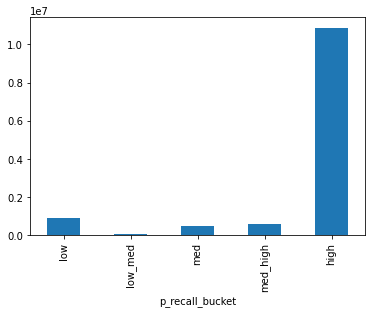

In [38]:
learn_df.groupby('p_recall_bucket').size().plot(kind= 'bar')

<AxesSubplot:>

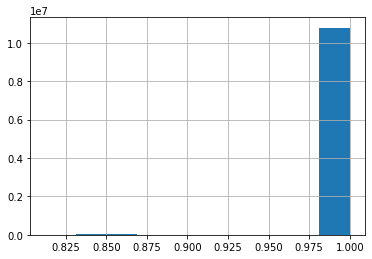

In [41]:
learn_df.loc[learn_df.p_recall_bucket== 'high'].p_recall.hist(bins=10)

In [43]:
(learn_df.p_recall == 1).sum()/learn_df.shape[0]

0.8388635768501347